The problem statement clearly explains the issue of cybersecurity and how we can 
analyse it using modern data mining techniques. It is difficult to analyse or detect fraud 
transactions without help of machine learning classifiers. This kernel helps to understand data 
with basic visualization and statistical methods. The main objective of the project is to predict 
credit fraud from the past credit card dataset.

# Problem understanding


Credit card is very popular and plays an important role in electronic commerce and online 
money transaction area which is growing every year. As a result of the growing usage of credit 
card, fraudsters try to find more opportunities to commit frauds that can cause huge losses to 
cardholders and banks.


# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve,roc_auc_score
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE

# DATA DESCRIPTION

# Loading the Dataset

In [2]:
#Load the dataset
df=pd.read_csv('creditcard.csv')

In [3]:
#Print first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Print last 5 rows
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# DATA PREPROCESSING

# Analyse the Information about the dataset

In [5]:
#to find the shape of the dataset
df.shape

(284807, 31)

In [6]:
# OBSERVATION:

# >> The dataset contains 284807 Transactions or Observations
# >> There are 31 columns present in the dataset

In [7]:
# Checking column names

df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
# OBSERVATION:

# >> Features V1, V2, … V28 are the principal components obtained with PCA, 
# >> the only features which have not been transformed with PCA are 'Time' and 'Amount'.

In [9]:
#to see the information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
# OBSERVATION:

# >> From the above output we can infer that our dataset does has 284807 Non-Null Values

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
# OBSERVATION:

# >> From the Statistical Summary we obtained the parameters such as Count, Mean, Standard deviation, Quantiles, 
#    Minimum value and Maximum Values in each column.

# >> For instance, Under column "Time",
#    1) Maximum value in the column = 172792
#    2) Minimum value in the column = 0
#    3) Mean = 94813.859575
#    4) Standard deviation = 47488.145955
#    5) Q1 = 54201.50
#    6) Q2 = 84692.00
#    7) Q3 = 139320.50

# >> Similarly we have obtained these parameters for all the 31 columns in the dataset

In [13]:
#checking missing values
df.isnull().values.any()

False

In [14]:
#From the above we can infer that there is no missing values

In [15]:
#checking the number of null values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
#from the above we can say that there is no missing values in any of the columns.

# Encoding Categorical Data


In [17]:
df.select_dtypes(include='object').columns

Index([], dtype='object')

In [18]:
len(df.select_dtypes(include='object').columns)

0

In [19]:
#Observation
#There is no categorical data in our dataset

In [20]:
df.select_dtypes(exclude='object').columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [21]:
len(df.select_dtypes(exclude='object').columns)

31

# Dealing with outliers: Z-Score method

In [22]:
df[np.abs(stats.zscore(df)>3).all(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [23]:
# OBSERVATION:

# >> From the above output we can infer that there are no outliers present in our dataset

# Exploratory Data Analysis & Business Insights

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

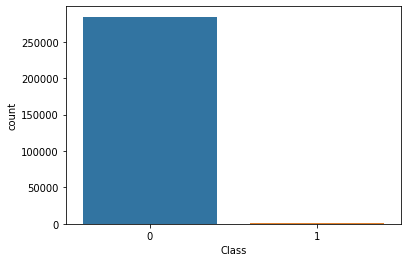

In [24]:
sns.countplot(df['Class'])

In [25]:
# OBSERVATION ON COUNTPLOT:

# >> From the above count plot we can see the count of 0's which refers to the Non - Fraudulent transactions
#    and the 1's which refers to the Fraudulent transactions

# OBSERVATION ON METRIC:

# >> Count of Non - Fraudulent Transactions = 284315
# >> Count of Fraudulent Transactions = 492
# >> By looking at the proportion of fraudulent to Non - Fraudulent transactions, we can infer that our dataset is 
#    "highly Unbalanced"

In [26]:
#find the distribution of legit transaction and fradulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [27]:
# from the above code we can say,this datset is highly imbalanced.
# 0 represents Normal transaction
# 1 represents fradulent transaction

# CORRELATION MATRIX AND HEATMAP

In [28]:
df1=df.drop(df['Class'])

In [29]:
df1.corrwith(df['Class'])

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192962
V4        0.133448
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154877
V12      -0.260594
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
dtype: float64

<AxesSubplot:title={'center':'correlation of other features with class'}>

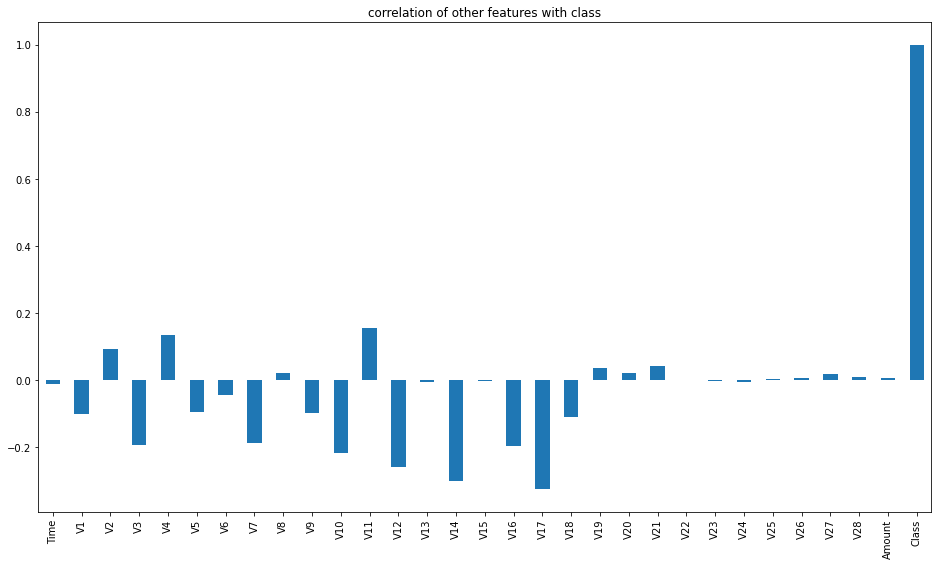

In [30]:
df1.corrwith(df['Class']).plot(kind='bar',figsize=(16,9),title='correlation of other features with class')

In [31]:
# Observation:
#     From the above plot we can say that no features are strongly correlated with target variable class

In [32]:
num_var=df.drop('Class',axis=1)


C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


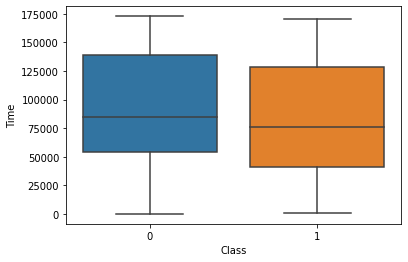

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


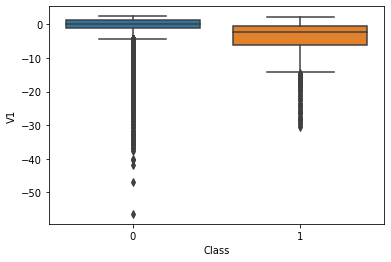

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


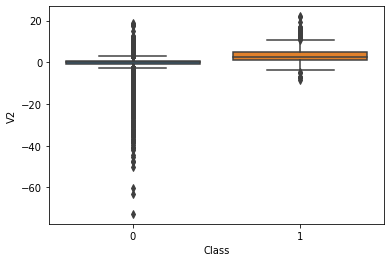

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


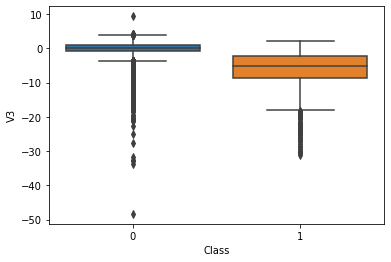

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


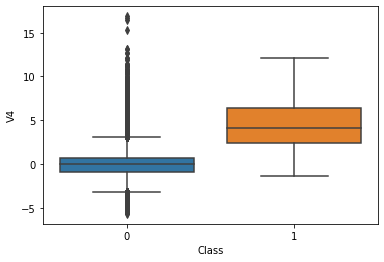

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


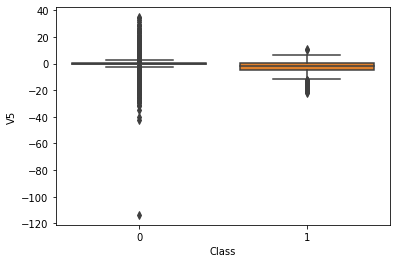

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


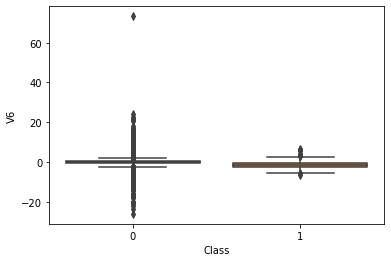

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


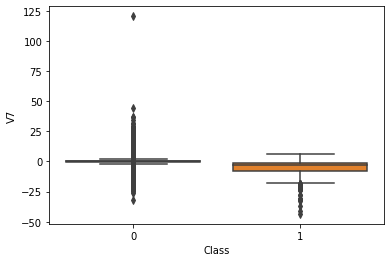

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


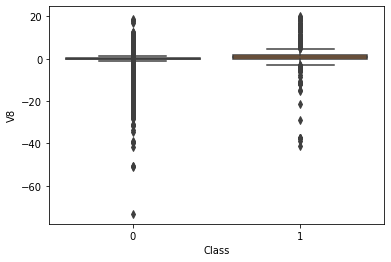

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


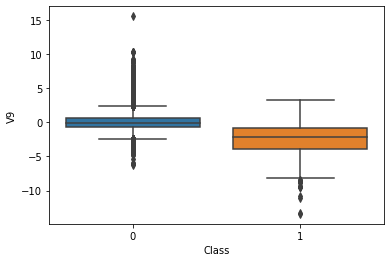

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


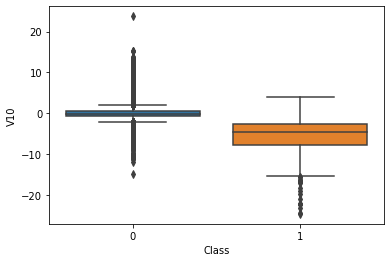

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


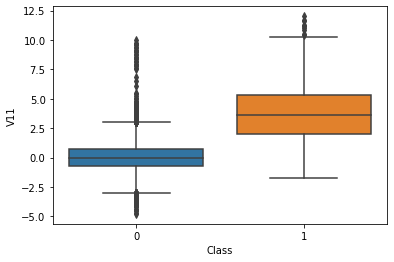

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


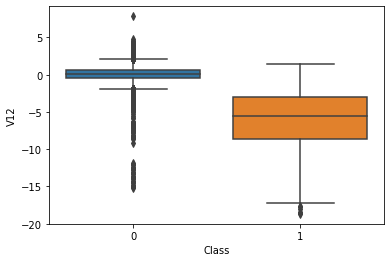

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


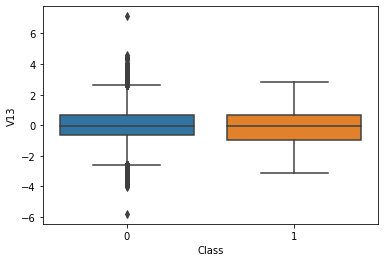

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


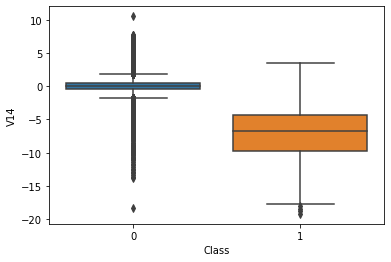

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


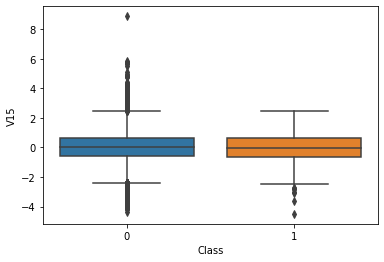

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


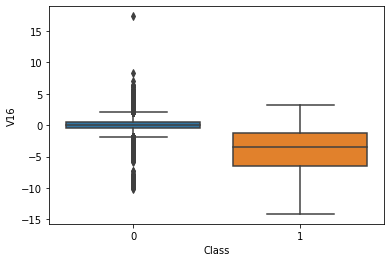

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


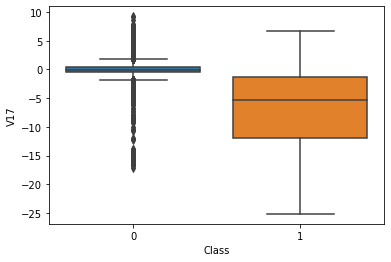

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


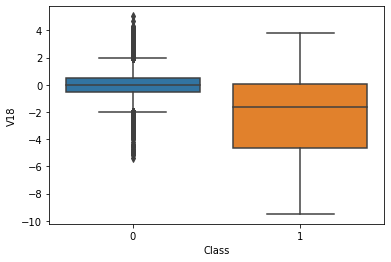

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


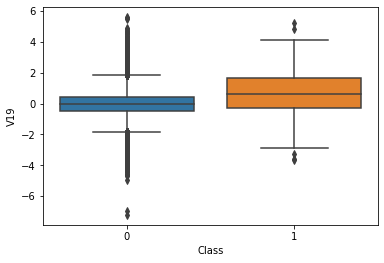

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


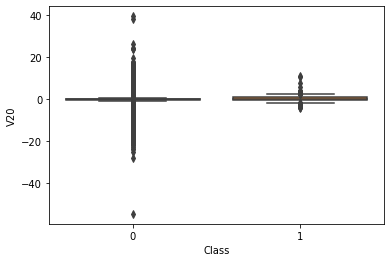

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


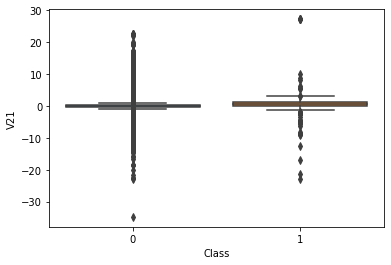

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


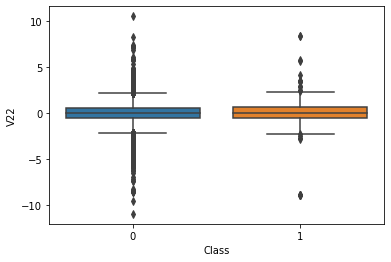

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


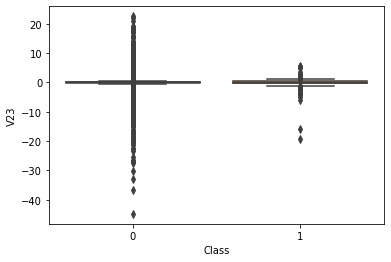

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


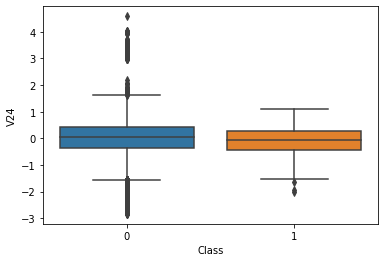

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


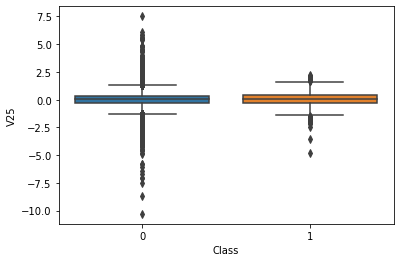

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


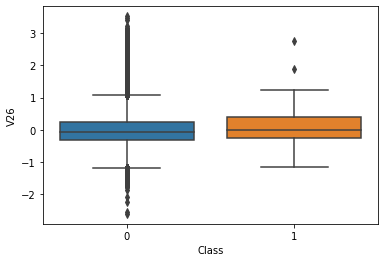

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


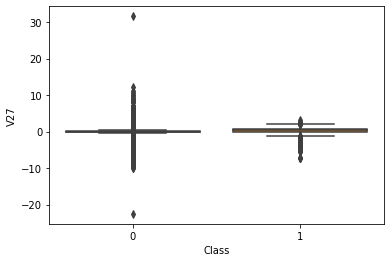

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


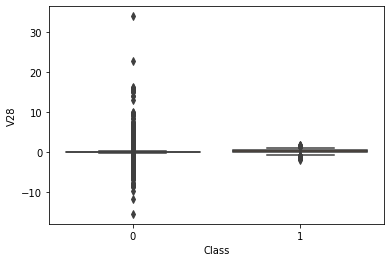

C:\Users\V.BHARATHI\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


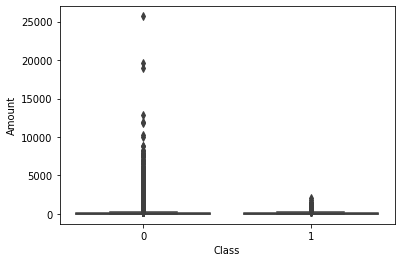

In [33]:
for i in num_var.columns:
    sns.boxplot('Class',i,data=df)
    plt.show()

# Heatmap of dataset

<AxesSubplot:>

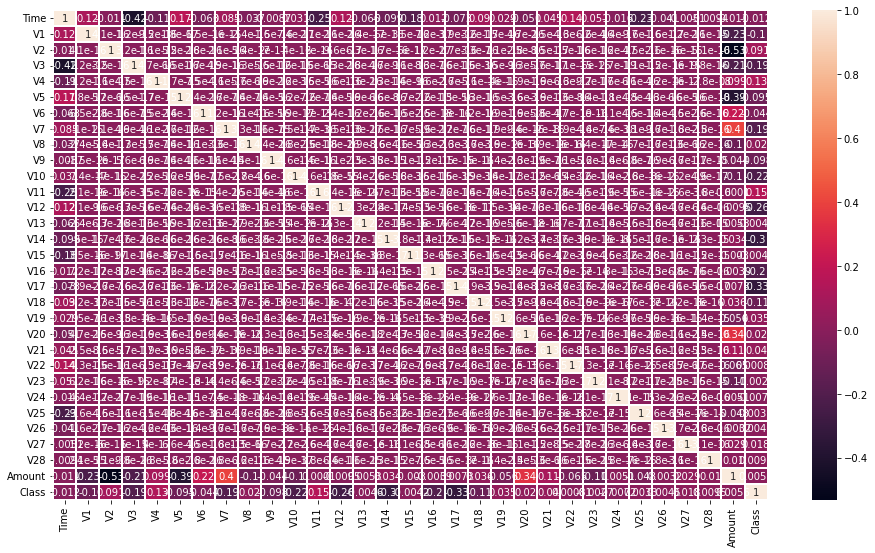

In [34]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,linewidths=2)

In [35]:
# INFERENCE:

# >> From this heatmap, we can see that the intersecting box which has color towards to white has high correlation
# >> From this heatmap, we can see that the intersecting box which has color towards to black has low correlation

# DATA PREPARATION

# Train_Test_Split

In [36]:
#Splitting the datas into features and targets

In [37]:
x=df.drop(columns='Class',axis=1)
y=df['Class']

In [38]:
print(x.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27 

In [39]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


In [40]:
print(x.shape)
print(y.shape)

(284807, 30)
(284807,)


In [41]:
#splitting the data into training data into testing data

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=2,stratify=y)

In [43]:
print(x.shape,xtrain.shape,xtest.shape)

(284807, 30) (227845, 30) (56962, 30)


In [44]:
xtrain

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
243389,151916.0,0.201840,0.814359,-1.039124,-0.351936,1.165946,-0.377859,1.326223,-0.262268,-0.253688,...,0.196694,0.312094,0.890752,-0.064932,-0.026465,-0.202777,-0.152459,0.115266,0.139604,94.36
67696,52663.0,1.219060,-0.207708,0.782809,0.271655,-0.456658,0.414201,-0.675133,0.057714,0.601970,...,0.166221,0.170372,0.541010,-0.257175,-0.904534,0.414090,0.653565,0.014583,0.027320,47.65
196292,131438.0,1.820307,-1.168447,-1.636245,-0.452077,0.123191,0.842629,-0.465635,0.182277,-0.215586,...,-0.523770,0.088054,0.714346,0.049894,-0.350602,-0.048669,0.038473,0.034850,-0.039948,122.50
21615,31767.0,-1.139164,1.132194,1.514213,-1.178960,-0.543484,-0.944796,0.231654,0.411327,-0.248846,...,-0.108074,0.045632,0.065280,0.081683,0.655150,-0.452448,0.703637,0.019069,0.111934,1.79
145241,86753.0,2.118619,-0.347077,-3.557670,-1.423362,2.828792,2.641517,0.092265,0.483641,-0.096698,...,-0.086643,0.107128,0.265413,0.047491,0.816079,0.198762,1.437119,-0.161027,-0.099222,19.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69742,53566.0,-0.736702,-1.022705,1.392515,-1.363957,-0.119859,1.543687,-0.417116,0.523380,-0.600496,...,0.534410,0.187483,0.315677,0.100507,-1.712971,-0.107975,-0.202680,0.116366,0.127670,152.07
6242,7307.0,-0.435465,0.788678,2.144459,0.282102,-0.267503,-0.274036,0.303976,-0.004672,0.973030,...,-0.042650,0.099986,0.539476,-0.068115,0.379778,-0.212869,0.357165,0.023472,0.056758,30.24
235303,148334.0,-0.271746,1.086914,-0.292901,-0.750743,1.002780,-0.628570,0.949627,-0.002950,-0.254329,...,-0.017398,-0.186868,-0.485429,0.151234,0.653595,-1.086532,-0.021671,0.272112,0.314638,2.69
263726,161085.0,-0.871347,0.675553,0.714726,-1.227836,1.165125,-0.778575,1.107328,-0.307677,-0.091884,...,-0.060463,-0.265985,-0.571584,-0.201417,-0.341740,-0.275119,0.047114,-0.133373,0.000715,2.67


# Feature scaling

In [45]:
ss=StandardScaler()

In [46]:
xtrain=pd.DataFrame(ss.fit_transform(xtrain),columns=xtrain.columns)
xtrain

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.202816,0.102994,0.492605,-0.687059,-0.248706,0.839130,-0.282677,1.064445,-0.220274,-0.232382,...,0.255520,0.425028,1.227887,-0.102502,-0.045138,-0.387828,-0.315251,0.282632,0.420928,0.024254
1,-0.888035,0.621671,-0.125083,0.517236,0.192060,-0.328661,0.309477,-0.541822,0.047753,0.546227,...,0.216235,0.232026,0.746017,-0.407454,-1.495585,0.794358,1.356746,0.035717,0.082829,-0.161122
2,0.771429,0.928245,-0.705708,-1.081754,-0.319488,0.088657,0.629775,-0.373682,0.152091,-0.197711,...,-0.673282,0.119923,0.984837,0.079645,-0.580568,-0.092491,0.080814,0.085420,-0.119721,0.135931
3,-1.328228,-0.580781,0.684689,1.000692,-0.833263,-0.391150,-0.706526,0.185956,0.343951,-0.227976,...,-0.137379,0.062152,0.090565,0.130071,1.080794,-0.866306,1.460614,0.046717,0.337609,-0.343124
4,-0.169900,1.080354,-0.209311,-2.351813,-1.006011,2.035885,1.974647,0.074083,0.404523,-0.089528,...,-0.109751,0.145900,0.366305,0.075833,1.346625,0.381696,2.982129,-0.394951,-0.298201,-0.273196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,-0.869013,-0.375566,-0.617628,0.920250,-0.964023,-0.086267,1.153895,-0.334740,0.437810,-0.547961,...,0.690894,0.255329,0.435557,0.159932,-2.831010,-0.206145,-0.419427,0.285329,0.384993,0.253284
227841,-1.843499,-0.221966,0.477085,1.417283,0.199445,-0.192526,-0.205058,0.244000,-0.004503,0.883874,...,-0.053036,0.136174,0.743904,-0.107550,0.625917,-0.407167,0.741901,0.057515,0.171470,-0.230216
227842,1.127358,-0.138486,0.657324,-0.193807,-0.530590,0.721700,-0.470112,0.762193,-0.003061,-0.232965,...,-0.020482,-0.254474,-0.668193,0.240398,1.078226,-2.081487,-0.043946,0.667283,0.947970,-0.339552
227843,1.395969,-0.444221,0.408718,0.472233,-0.867809,0.838540,-0.582257,0.888762,-0.258310,-0.085148,...,-0.076000,-0.362217,-0.786896,-0.319005,-0.565929,-0.526466,0.098740,-0.327132,0.002720,-0.339632


In [47]:
xtest=pd.DataFrame(ss.fit_transform(xtest),columns=xtest.columns)
xtest

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.158636,1.043833,0.096063,-1.192124,0.373935,0.155149,-1.112182,0.234201,-0.312793,0.584655,...,-0.249874,0.254573,0.919654,-0.088334,-0.306291,0.494015,-0.201088,-0.015679,-0.089378,-0.283453
1,-0.189965,0.699430,-0.371849,0.182703,-0.528349,-0.746004,-0.421571,-0.524697,-0.000252,-0.814845,...,-0.692115,-0.589336,-1.199096,0.115932,0.006745,0.223090,1.973864,-0.174751,-0.018205,-0.316642
2,0.613384,-0.774408,0.032748,0.738064,-0.792778,1.581538,-0.863085,0.678745,-0.316328,-0.488558,...,-0.243146,0.279720,1.152236,-1.515211,-0.490544,2.126765,-0.207445,-0.408247,-0.787058,-0.325093
3,-0.390513,0.584931,-0.101940,0.804549,0.568467,-0.634510,0.138417,-0.553946,0.152537,0.772221,...,-0.137659,-0.079074,0.123546,0.089682,0.233541,0.384639,0.709006,0.096591,0.075330,-0.332762
4,-0.538538,0.725564,-0.741440,0.394412,-0.760319,-1.264589,-0.395784,-0.919976,0.003019,-1.208092,...,-0.619600,-0.464581,-0.659327,0.203604,0.582209,0.542880,-0.480419,0.120149,0.051175,-0.275208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,1.409310,1.032908,-0.142829,-1.416232,0.043293,0.682514,-0.034561,0.329134,-0.135349,0.128258,...,-0.089488,-0.012683,0.025693,-0.082432,-0.225942,0.494583,1.158205,-0.288777,-0.251925,-0.139363
56958,-0.065238,-0.108429,0.490723,0.241165,-0.085632,0.875115,-0.054807,0.526418,-0.050549,0.655714,...,-0.008730,0.273089,1.097859,-0.634650,0.417477,0.156595,-0.041813,0.269408,0.424728,-0.350490
56959,-1.687642,-0.456199,0.034244,1.330677,-0.590831,0.376567,-0.295057,-0.141579,0.158831,0.875675,...,0.013994,0.162352,0.522945,-0.111830,0.048675,-0.138552,1.828878,-0.273739,-0.028273,-0.312519
56960,1.166079,-0.537959,0.586012,-1.101902,0.458392,0.899623,-0.755099,0.475468,0.097481,-0.105329,...,-0.516683,0.363360,1.453462,-0.525736,-0.570577,-2.879503,-1.626850,1.046086,0.516352,-0.361786


# Checking the assumptions for basic model

#  1. Appropriate Outcome Type

In [48]:
df['Class'].nunique()

2

# 2. Linearity of independent variables and log-odds

In [49]:
# One of the critical assumptions of logistic regression is that the relationship between the logit (aka log-odds)
# of the outcome and each continuous independent variable is linear.
# Logit(p)=log(p/1-p)
# The logit is the logarithm of the odds ratio, where p = probability of a positive outcome


# 3.No strongly influential outliers

In [50]:
df[np.abs(stats.zscore(df)>3).all(axis=1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [51]:
#from the above code there is no outliers

# 4.Checking for multicollinearity

In [52]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [53]:
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

   feature        VIF
0     Time   2.339858
1       V1   1.638237
2       V2   3.900804
3       V3   1.321018
4       V4   1.172479
5       V5   2.764441
6       V6   1.528629
7       V7   2.603517
8       V8   1.098591
9       V9   1.037715
10     V10   1.208870
11     V11   1.080378
12     V12   1.154440
13     V13   1.003473
14     V14   1.219562
15     V15   1.014148
16     V16   1.080994
17     V17   1.227258
18     V18   1.033900
19     V19   1.040800
20     V20   2.233935
21     V21   1.103107
22     V22   1.082408
23     V23   1.149293
24     V24   1.000773
25     V25   1.013526
26     V26   1.000539
27     V27   1.009509
28     V28   1.001595
29  Amount  11.507919
30   Class   2.093512


In [54]:
# From our model we can infer that the maximum VIF score is for V7 is 45 
# and the minimum VIF score is for ‘V13’ and the score is 1.17

In [55]:
# As we didn't have any description about the column names we cannot say about multicollinearity between the columns

# 5. Independence of observations

In [56]:

# The observations must be independent of each other, i.e., they should not come from repeated or paired data. 
# This means that each observation is not influenced by or related to the rest of the observations.
# As our Independent columns are obtained with PCA.PCA components does not have autocorrelation between the columns,
# here all independent columns are PCA components so the autocorrelation between them is not possible


# 6.Sufficiently large sample size

In [57]:

# There should be an adequate number of observations for each independent variable in the dataset 
# to avoid creating an overfit model.
# One rule of thumb is that there should be at least 10 observations with the least frequent outcome for
# each independent variable. We can check this by retrieving the value counts for each variable.
# Another way to determine a large sample size is that the total number of observations should be greater than 500.
# We can check this by getting the length of the entire data frame.


In [58]:
len(df)

284807

#  Distribution of variables

In [59]:
df.skew()

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

# BASIC MODEL

# Building a model

# Logistic Regression

In [60]:
#Here we use the Logistic Regression model.
#As our target variable is binary classification feature so go for Logistic regression


In [61]:
log_reg_basic=LogisticRegression()

In [62]:
#Training the model using training dataset

In [63]:
log_reg_basic.fit(xtrain,ytrain)

LogisticRegression()

In [64]:
#accuracy on training data
ytrain_logreg_basic=log_reg_basic.predict(xtrain)
# y_predict=logres.predict(xtest)
print('Classication report on train data')
print(classification_report(ytrain,ytrain_logreg_basic))

Classication report on train data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.88      0.61      0.72       394

    accuracy                           1.00    227845
   macro avg       0.94      0.80      0.86    227845
weighted avg       1.00      1.00      1.00    227845



<AxesSubplot:>

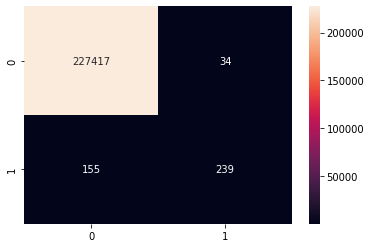

In [65]:
sns.heatmap(confusion_matrix(ytrain,ytrain_logreg_basic),annot=True,fmt='g')

In [66]:
ypred_proba_basic=log_reg_basic.predict_proba(xtrain)[:,1]

In [67]:
fpr,tpr,thres=roc_curve(ytrain,ypred_proba_basic)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':np.round(thres,3)})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.0
1,0.000000,0.002538,1.0
2,0.000000,0.007614,1.0
3,0.000000,0.015228,1.0
4,0.000000,0.020305,1.0
...,...,...,...
1313,0.998101,1.000000,0.0
1314,0.998109,1.000000,0.0
1315,0.999248,1.000000,0.0
1316,0.999266,1.000000,0.0


Text(0.5, 1.0, 'ROC Curve')

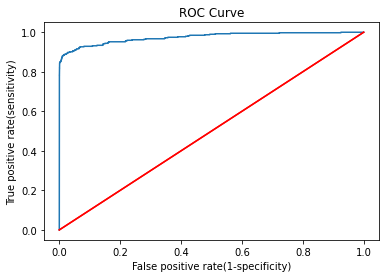

In [68]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [69]:
roc_auc_score(ytrain,ypred_proba_basic)

0.9742779094027885

In [70]:
#From the plot,the ROC-AUC score we obtained is 0.956.
# THIS IS THE RELATIONSHIP OBTAINED BETWEEN FALSE POSITIVE RATE AND TRUE POSITIVE RATE IN THE TRAIN DATA SET

# Test data

In [71]:
# accuracy on test data
ytest_predict_basic=log_reg_basic.predict(xtest)
print('Classication report on test data')
print(classification_report(ytest,ytest_predict_basic))

Classication report on test data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.70      0.79        98

    accuracy                           1.00     56962
   macro avg       0.95      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

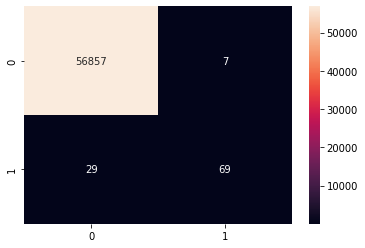

In [72]:
cm_lr=sns.heatmap(confusion_matrix(ytest,ytest_predict_basic),annot=True,fmt='g')
cm_lr

In [73]:
ytest_prob_basic=log_reg_basic.predict_proba(xtest)[:,1]

In [74]:
fpr,tpr,thres=roc_curve(ytest,ytest_prob_basic)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.010204,1.000000e+00
2,0.000000,0.163265,9.999997e-01
3,0.000000,0.183673,9.999997e-01
4,0.000000,0.204082,9.999993e-01
...,...,...,...
147,0.961751,1.000000,1.697897e-05
148,0.961786,1.000000,1.697194e-05
149,0.995674,1.000000,4.805163e-08
150,0.995709,1.000000,4.652352e-08


Text(0.5, 1.0, 'ROC Curve')

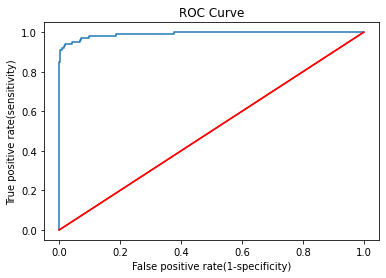

In [75]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [76]:
roc_auc_score(ytest,ytest_prob_basic)

0.9907909527063499

In [77]:
#From the plot,the ROC-AUC score we obtained is 0.928.
# THIS IS THE RELATIONSHIP OBTAINED BETWEEN FALSE POSITIVE RATE AND TRUE POSITIVE RATE IN THE TEST DATA SET

# Variable importance plot

In [78]:
vip_basic=RFE(log_reg_basic,n_features_to_select=15)

In [79]:
vip_basic.fit(xtrain,ytrain)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [80]:
vip_basic_df=pd.DataFrame({'features':xtrain.columns,'rank':vip_basic.ranking_})
vip_basic_df

,features,rank
0,Time,1
1,V1,4
2,V2,16
3,V3,13
4,V4,1
5,V5,1
6,V6,2
7,V7,5
8,V8,1
9,V9,1


In [81]:
vip_basic_df=vip_basic_df.sort_values(by='rank',ascending=True)
vip_basic_df


,features,rank
0,Time,1
27,V27,1
25,V25,1
22,V22,1
21,V21,1
20,V20,1
16,V16,1
15,V15,1
13,V13,1
10,V10,1


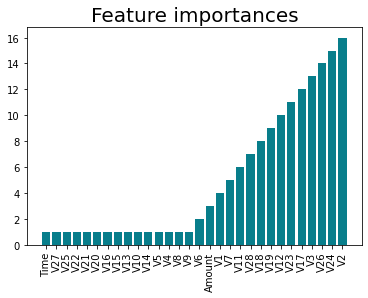

In [82]:
plt.bar(x=vip_basic_df['features'], height=vip_basic_df['rank'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

# summary of logistic regression

In [83]:
# logit = sm.Logit(ytrain,sm.add_constant(xtrain))
# lg    = logit.fit()

logit = sm.Logit( ytrain.values.reshape(-1,1), sm.add_constant( xtrain ) )
lg    = logit.fit()

Optimization terminated successfully.
         Current function value: 0.004096
         Iterations 13


In [84]:
lg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.678    
Dependent Variable: y                AIC:              1928.4618
Date:               2022-06-12 07:55 BIC:              2248.8908
No. Observations:   227845           Log-Likelihood:   -933.23  
Df Model:           30               LL-Null:          -2899.5  
Df Residuals:       227814           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     13.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
const       -8.5719    0.1575  -54.4085  0.0000  -8.8806  -8.2631
Time        -0.2832    0.1165   -2.4313  0.0150  -0.5116  -0.0549
V1           0.2195    0.0913    2.4031  0.0163   0.0405   0.3985
V2           0.0009    0.1009    0.0088  0.9930  -0.1970   0.1987
V3          -0.0605    0.0877   -0.6900  0.4902  -0.2324   0.1114
V4           0.9367    0.1116    8.3939  0.0000   0.7180   1.1554
V5           0.2244    0.0992    2.2615  0.0237   0.0299   0.4189
V6          -0.1333    0.1043   -1.2788  0.2010  -0.3377   0.0710
V7          -0.0982    0.0889   -1.1043  0.2695  -0.2724   0.0761
V8          -0.2179    0.0384   -5.6743  0.0000  -0.2932  -0.1427
V9          -0.3814    0.1336   -2.8546  0.0043  -0.6433  -0.1195
V10         -0.8926    0.1149   -7.7656  0.0000  -1.1179  -0.6673
V11         -0.1252    0.0914   -1.3707  0.1705  -0.3043   0.0538
V12          0.1187    0.0944    1.2578  0.2085  -0.0663   0.3036
V13         -0.3047    0.0895   -3.4042  0.0007  -0.4801  -0.1293
V14         -0.5605    0.0656   -8.5402  0.0000  -0.6891  -0.4318
V15         -0.0811    0.0859   -0.9443  0.3450  -0.2495   0.0872
V16         -0.0952    0.1214   -0.7842  0.4329  -0.3331   0.1427
V17         -0.0702    0.0633   -1.1081  0.2678  -0.1942   0.0539
V18         -0.0668    0.1187   -0.5628  0.5736  -0.2994   0.1658
V19          0.0900    0.0862    1.0437  0.2966  -0.0790   0.2590
V20         -0.3536    0.0702   -5.0340  0.0000  -0.4913  -0.2159
V21          0.3034    0.0477    6.3571  0.0000   0.2099   0.3970
V22          0.4651    0.1047    4.4412  0.0000   0.2599   0.6704
V23         -0.0605    0.0405   -1.4926  0.1355  -0.1399   0.0189
V24          0.0189    0.0952    0.1989  0.8423  -0.1677   0.2056
V25         -0.0792    0.0739   -1.0717  0.2839  -0.2241   0.0657
V26          0.0569    0.0969    0.5876  0.5568  -0.1330   0.2469
V27         -0.3346    0.0553   -6.0539  0.0000  -0.4430  -0.2263
V28         -0.0907    0.0345   -2.6281  0.0086  -0.1584  -0.0231
Amount       0.2158    0.0963    2.2417  0.0250   0.0271   0.4045
================================================================

"""

# SMOTE

In [85]:
smote=SMOTE(sampling_strategy=0.3)

In [86]:
np.random.seed(0)
xtrain_smote,ytrain_smote=smote.fit_resample(xtrain.astype('float'),ytrain)

In [87]:
from collections import Counter

In [88]:
print('Before SMOTE',Counter(ytrain))
print('After SMOTE',Counter(ytrain_smote))

Before SMOTE Counter({0: 227451, 1: 394})
After SMOTE Counter({0: 227451, 1: 68235})


In [89]:
xtrain_smote.shape

(295686, 30)

In [90]:
log_reg_smote=LogisticRegression()

In [91]:
log_reg_smote.fit(xtrain_smote,ytrain_smote)

LogisticRegression()

In [92]:
ytrain_predict_smote=log_reg_smote.predict(xtrain_smote)
# y_predict=logres.predict(xtest)
print('Classication report on train data')
print(classification_report(ytrain_smote,ytrain_predict_smote))

Classication report on train data
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    227451
           1       0.97      0.88      0.92     68235

    accuracy                           0.97    295686
   macro avg       0.97      0.93      0.95    295686
weighted avg       0.97      0.97      0.96    295686



<AxesSubplot:>

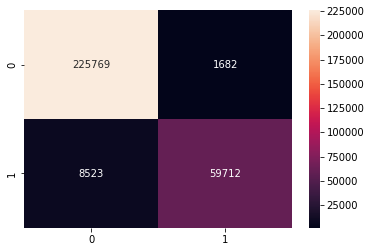

In [93]:
sns.heatmap(confusion_matrix(ytrain_smote,ytrain_predict_smote),annot=True,fmt='g')

In [94]:
ytrain_prob_smote=log_reg_smote.predict_proba(xtrain_smote)[:,1]

In [95]:
fpr,tpr,thres=roc_curve(ytrain_smote,ytrain_prob_smote)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000e+00
1,0.000040,0.149967,1.000000e+00
2,0.000048,0.155155,1.000000e+00
3,0.000048,0.158672,1.000000e+00
4,0.000048,0.160812,1.000000e+00
...,...,...,...
17757,0.999829,1.000000,2.033923e-11
17758,0.999837,1.000000,1.615160e-11
17759,0.999846,1.000000,1.445326e-11
17760,0.999855,1.000000,1.386152e-11


Text(0.5, 1.0, 'ROC Curve')

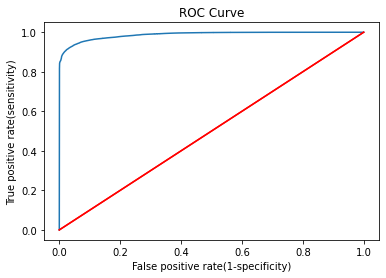

In [96]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [97]:
roc_auc_score(ytrain_smote,ytrain_prob_smote)

0.9871274072258667

# Test data

In [98]:
ytest_predict_smote=log_reg_smote.predict(xtest)

In [99]:
print(classification_report(ytest,ytest_predict_smote))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.91      0.28        98

    accuracy                           0.99     56962
   macro avg       0.58      0.95      0.64     56962
weighted avg       1.00      0.99      0.99     56962



<AxesSubplot:>

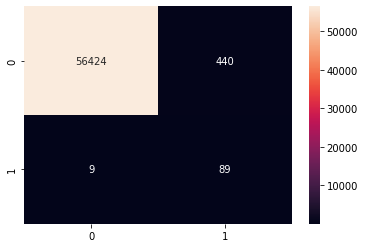

In [100]:
sns.heatmap(confusion_matrix(ytest,ytest_predict_smote),annot=True,fmt='g')

In [101]:
ytest_prob_smote=log_reg_smote.predict_proba(xtest)[:,1]

In [102]:
fpr,tpr,thres=roc_curve(ytest,ytest_prob_smote)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000e+00
1,0.000018,0.153061,1.000000e+00
2,0.000018,0.204082,1.000000e+00
3,0.000018,0.224490,1.000000e+00
4,0.000018,0.285714,1.000000e+00
...,...,...,...
143,0.998066,1.000000,6.413126e-08
144,0.998101,1.000000,6.324120e-08
145,0.999894,1.000000,9.145453e-12
146,0.999930,1.000000,7.352822e-12


Text(0.5, 1.0, 'ROC Curve')

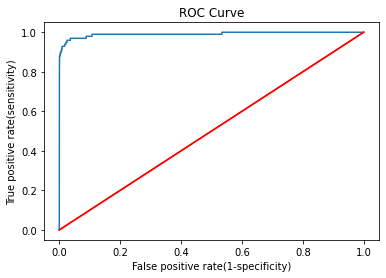

In [103]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [104]:
roc_auc_score(ytest,ytest_prob_smote)

0.9911102788751968

# Variable importance plot

In [105]:
vip_smote=RFE(log_reg_smote,n_features_to_select=15)

In [106]:
vip_smote.fit(xtrain_smote,ytrain_smote)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [107]:
vip_smote_df=pd.DataFrame({'features':xtrain_smote.columns,'rank':vip_smote.ranking_})
vip_smote_df

,features,rank
0,Time,1
1,V1,1
2,V2,1
3,V3,9
4,V4,1
5,V5,1
6,V6,1
7,V7,15
8,V8,1
9,V9,5


In [108]:
vip_smote_df=vip_smote_df.sort_values(by='rank',ascending=True)
vip_smote_df


,features,rank
0,Time,1
22,V22,1
17,V17,1
13,V13,1
12,V12,1
11,V11,1
10,V10,1
8,V8,1
14,V14,1
29,Amount,1


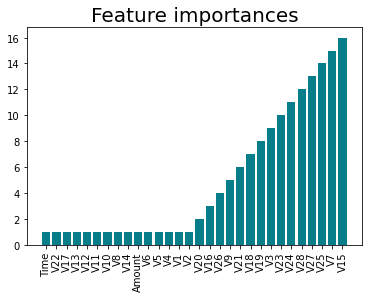

In [109]:
plt.bar(x=vip_smote_df['features'], height=vip_smote_df['rank'], color='#087E8B')
plt.title('Feature importances', size=20)
plt.xticks(rotation='vertical')
plt.show()

# Decision tree

In [114]:
dt=DecisionTreeClassifier()

In [115]:
dt.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier()

In [116]:
ytrain_predict_dt=dt.predict(xtrain_smote)

In [117]:
print(classification_report(ytrain_smote,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00     68235

    accuracy                           1.00    295686
   macro avg       1.00      1.00      1.00    295686
weighted avg       1.00      1.00      1.00    295686



<AxesSubplot:>

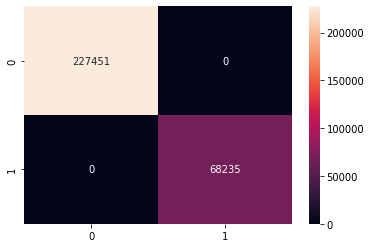

In [118]:
sns.heatmap(confusion_matrix(ytrain_smote,ytrain_predict_dt),annot=True,fmt='g')

In [119]:
ytrain_prob_dt=dt.predict_proba(xtrain_smote)[:,1]

In [120]:
fpr,tpr,thres=roc_curve(ytrain_smote,ytrain_prob_dt)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.0,0.0,2.0
1,0.0,1.0,1.0
2,1.0,1.0,0.0


Text(0.5, 1.0, 'ROC Curve')

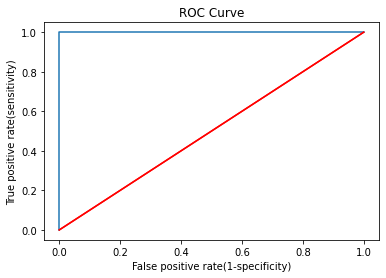

In [121]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [122]:
roc_auc_score(ytrain_smote,ytrain_prob_dt)

1.0

# Test data

In [123]:
ytest_predict_dt=dt.predict(xtest)

In [124]:
print(classification_report(ytest,ytest_predict_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.27      0.82      0.41        98

    accuracy                           1.00     56962
   macro avg       0.64      0.91      0.70     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

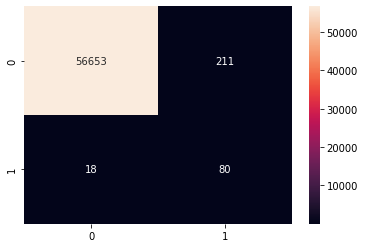

In [125]:
sns.heatmap(confusion_matrix(ytest,ytest_predict_dt),annot=True,fmt='g')

In [126]:
ytest_prob_dt=dt.predict_proba(xtest)[:,1]

In [127]:
fpr,tpr,thres=roc_curve(ytest,ytest_prob_dt)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.0
1,0.003711,0.816327,1.0
2,1.000000,1.000000,0.0


Text(0.5, 1.0, 'ROC Curve')

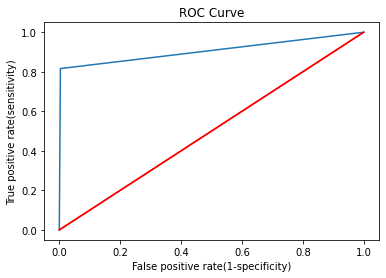

In [128]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [129]:
roc_auc_score(ytest,ytest_prob_dt)

0.9063079614231737

# hyperparameter tuning

In [130]:
params={'max_depth':[1,2,3,4,5,6]}

In [131]:
search=GridSearchCV(dt,param_grid=params,cv=5,scoring='f1_weighted')

In [132]:
search.fit(xtrain_smote,ytrain_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6]},
             scoring='f1_weighted')

In [133]:
search.best_params_

{'max_depth': 6}

# Decision tree-best

In [134]:
dt_best=DecisionTreeClassifier(max_depth=6)

In [135]:
dt_best.fit(xtrain_smote,ytrain_smote)

DecisionTreeClassifier(max_depth=6)

In [136]:
ytrain_predict_dt_best=dt_best.predict(xtrain_smote)

In [137]:
print(classification_report(ytrain_smote,ytrain_predict_dt_best))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    227451
           1       0.99      0.87      0.93     68235

    accuracy                           0.97    295686
   macro avg       0.98      0.94      0.95    295686
weighted avg       0.97      0.97      0.97    295686



<AxesSubplot:>

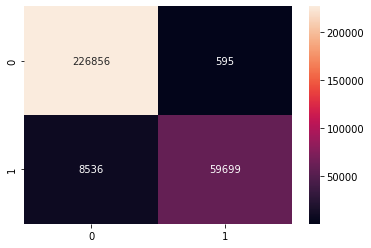

In [138]:
sns.heatmap(confusion_matrix(ytrain_smote,ytrain_predict_dt_best),annot=True,fmt='g')

In [139]:
ytrain_prob_dt_best=dt_best.predict_proba(xtrain_smote)[:,1]

In [140]:
fpr,tpr,thres=roc_curve(ytrain_smote,ytrain_prob_dt_best)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.002125,1.000000
2,0.000273,0.799853,0.998862
3,0.000295,0.818817,0.996151
4,0.000444,0.851542,0.985002
5,0.000528,0.852539,0.781609
6,0.002242,0.872763,0.779661
7,0.002277,0.872998,0.666667
8,0.002585,0.874756,0.631579
9,0.002616,0.874903,0.588235


Text(0.5, 1.0, 'ROC Curve')

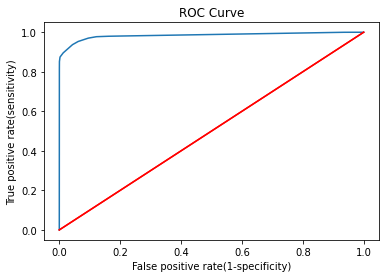

In [141]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [142]:
roc_auc_score(ytrain_smote,ytrain_prob_dt_best)

0.9840502366805792

# Test data

In [143]:
ytest_predict_dt_best=dt_best.predict(xtest)

In [144]:
print(classification_report(ytest,ytest_predict_dt_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.35      0.88      0.50        98

    accuracy                           1.00     56962
   macro avg       0.67      0.94      0.75     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

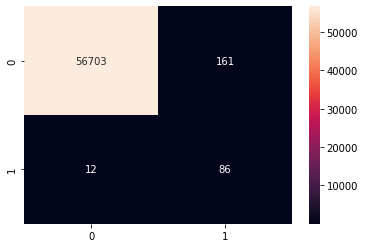

In [145]:
sns.heatmap(confusion_matrix(ytest,ytest_predict_dt_best),annot=True,fmt='g')

In [146]:
ytest_prob_dt_best=dt_best.predict_proba(xtest)[:,1]

In [147]:
fpr,tpr,thres=roc_curve(ytest,ytest_prob_dt_best)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000018,0.000000,1.000000
2,0.000369,0.816327,0.998862
3,0.000404,0.826531,0.996151
4,0.000633,0.857143,0.985002
5,0.000756,0.857143,0.781609
6,0.002427,0.877551,0.779661
7,0.002497,0.877551,0.666667
8,0.002796,0.877551,0.631579
9,0.002831,0.877551,0.588235


Text(0.5, 1.0, 'ROC Curve')

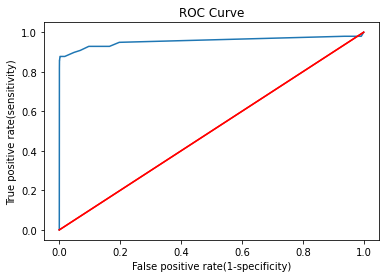

In [148]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [149]:
roc_auc_score(ytest,ytest_prob_dt_best)

0.9554448925039909

# Variable importance plot

In [150]:
importances = pd.DataFrame(data={
    'Attribute': xtrain_smote.columns,
    'Importance': dt_best.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
14,V14,0.886470
17,V17,0.039708
4,V4,0.026759
12,V12,0.014463
8,V8,0.011855
29,Amount,0.007164
26,V26,0.002822
7,V7,0.002641
21,V21,0.002436
10,V10,0.001539


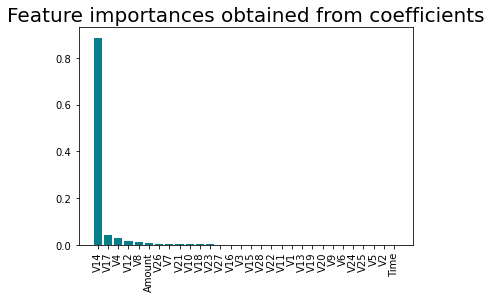

In [151]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [152]:
# from the variable importance plot we can say that the variables v14,v17,v4,v12,v8,Amount,v26,v7,v21,v10 are
#  influence the target variable more than other independent variables

# random forest

In [153]:
rf=RandomForestClassifier()

In [154]:
rf.fit(xtrain_smote,ytrain_smote)

RandomForestClassifier()

In [155]:
ytrain_predict_rf=rf.predict(xtrain_smote)

In [156]:
print(classification_report(ytrain_smote,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00     68235

    accuracy                           1.00    295686
   macro avg       1.00      1.00      1.00    295686
weighted avg       1.00      1.00      1.00    295686



<AxesSubplot:>

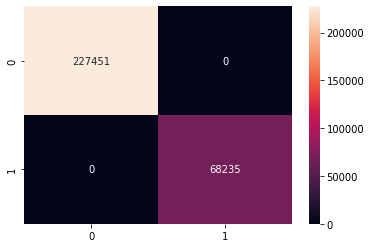

In [157]:
sns.heatmap(confusion_matrix(ytrain_smote,ytrain_predict_rf),annot=True,fmt='g')

In [158]:
ytrain_prob_rf=rf.predict_proba(xtrain_smote)[:,1]

In [159]:
fpr,tpr,thres=roc_curve(ytrain_smote,ytrain_prob_rf)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.00
1,0.000000,0.908419,1.00
2,0.000000,0.949967,0.99
3,0.000000,0.966601,0.98
4,0.000000,0.975907,0.97
5,0.000000,0.982721,0.96
6,0.000000,0.987177,0.95
7,0.000000,0.990313,0.94
8,0.000000,0.992379,0.93
9,0.000000,0.994065,0.92


Text(0.5, 1.0, 'ROC Curve')

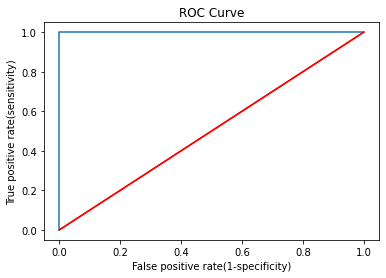

In [160]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [161]:
roc_auc_score(ytrain_smote,ytrain_prob_rf)

1.0

# Test data

In [162]:
ytest_predict_rf=rf.predict(xtest)

In [163]:
print(classification_report(ytest,ytest_predict_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.85      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

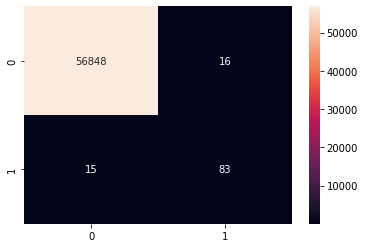

In [164]:
sns.heatmap(confusion_matrix(ytest,ytest_predict_rf),annot=True,fmt='g')

In [165]:
ytest_prob_rf=rf.predict_proba(xtest)[:,1]

In [166]:
fpr,tpr,thres=roc_curve(ytest,ytest_prob_rf)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.00
1,0.000000,0.153061,1.00
2,0.000000,0.295918,0.99
3,0.000000,0.418367,0.98
4,0.000000,0.479592,0.97
5,0.000000,0.530612,0.96
6,0.000000,0.591837,0.95
7,0.000000,0.602041,0.94
8,0.000000,0.622449,0.93
9,0.000000,0.663265,0.92


Text(0.5, 1.0, 'ROC Curve')

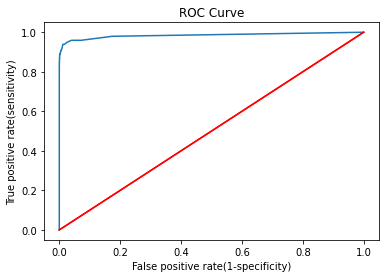

In [167]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [168]:
roc_auc_score(ytest,ytest_prob_rf)

0.9845575874553535

# hyperparameter tuning

In [169]:
params={'max_depth':[1,2,3,4,5,6],
       'n_estimators':[1,2,3,4,5,6,7,8,9,10]}

In [170]:
search=GridSearchCV(rf,param_grid=params,cv=5,scoring='f1_weighted')

In [171]:
search.fit(xtrain_smote,ytrain_smote)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_weighted')

In [172]:
search.best_params_

{'max_depth': 6, 'n_estimators': 5}

# random forest-best

In [173]:
rf_best=RandomForestClassifier(max_depth=6,n_estimators=2)

In [174]:
rf_best.fit(xtrain_smote,ytrain_smote)

RandomForestClassifier(max_depth=6, n_estimators=2)

In [175]:
ytrain_predict_rf_best=rf_best.predict(xtrain_smote)

In [176]:
print(classification_report(ytrain_smote,ytrain_predict_rf_best))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    227451
           1       0.99      0.86      0.92     68235

    accuracy                           0.97    295686
   macro avg       0.98      0.93      0.95    295686
weighted avg       0.97      0.97      0.97    295686



<AxesSubplot:>

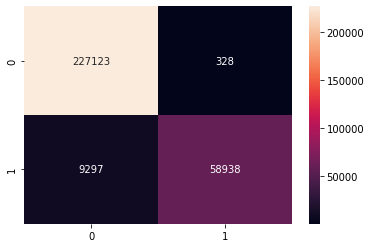

In [177]:
sns.heatmap(confusion_matrix(ytrain_smote,ytrain_predict_rf_best),annot=True,fmt='g')

In [178]:
ytrain_prob_rf_best=rf_best.predict_proba(xtrain_smote)[:,1]

In [179]:
fpr,tpr,thres=roc_curve(ytrain_smote,ytrain_prob_rf_best)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000000,0.000147,1.000000
2,0.000004,0.012809,0.999510
3,0.000004,0.013600,0.999369
4,0.000167,0.736543,0.998879
...,...,...,...
251,0.997995,1.000000,0.006827
252,0.998004,1.000000,0.005453
253,0.999305,1.000000,0.003226
254,0.999310,1.000000,0.002227


Text(0.5, 1.0, 'ROC Curve')

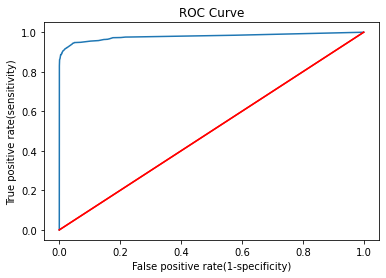

In [180]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [181]:
roc_auc_score(ytrain_smote,ytrain_prob_rf_best)

0.9790322850414668

# Test data

In [182]:
ytest_predict_rf_best=rf_best.predict(xtest)

In [183]:
print(classification_report(ytest,ytest_predict_rf_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.49      0.87      0.63        98

    accuracy                           1.00     56962
   macro avg       0.75      0.93      0.81     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

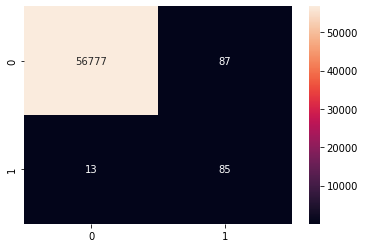

In [184]:
sns.heatmap(confusion_matrix(ytest,ytest_predict_rf_best),annot=True,fmt='g')

In [185]:
ytest_prob_rf_best=dt_best.predict_proba(xtest)[:,1]

In [186]:
fpr,tpr,thres=roc_curve(ytest,ytest_prob_rf_best)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000
1,0.000018,0.000000,1.000000
2,0.000369,0.816327,0.998862
3,0.000404,0.826531,0.996151
4,0.000633,0.857143,0.985002
5,0.000756,0.857143,0.781609
6,0.002427,0.877551,0.779661
7,0.002497,0.877551,0.666667
8,0.002796,0.877551,0.631579
9,0.002831,0.877551,0.588235


Text(0.5, 1.0, 'ROC Curve')

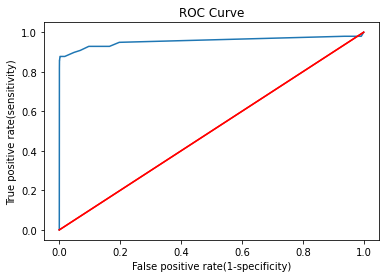

In [187]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [188]:
roc_auc_score(ytest,ytest_prob_rf_best)

0.9554448925039909

In [189]:
importances = pd.DataFrame(data={
    'Attribute': xtrain_smote.columns,
    'Importance': rf_best.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
14,V14,0.498278
12,V12,0.399014
10,V10,0.032395
4,V4,0.023666
17,V17,0.012836
26,V26,0.005014
21,V21,0.004965
29,Amount,0.004035
7,V7,0.002746
16,V16,0.002705


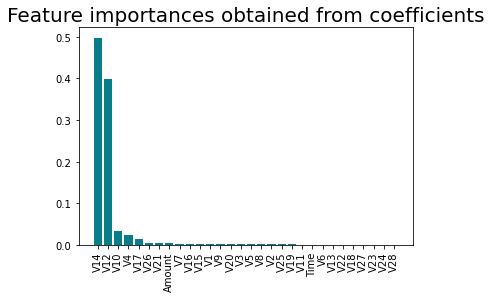

In [190]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [191]:
# from the variable importance plot we can say that the variables v12,v2,v11,v3,v14,v4,v10,v9,v17,v7 are
#  influence the target variable more than other independent variables

# XG Booost classifier

In [192]:
xg=XGBClassifier()

In [193]:
xg.fit(xtrain_smote,ytrain_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [194]:
ytrain_predict_xg=xg.predict(xtrain_smote)

In [195]:
print(classification_report(ytrain_smote,ytrain_predict_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00     68235

    accuracy                           1.00    295686
   macro avg       1.00      1.00      1.00    295686
weighted avg       1.00      1.00      1.00    295686



<AxesSubplot:>

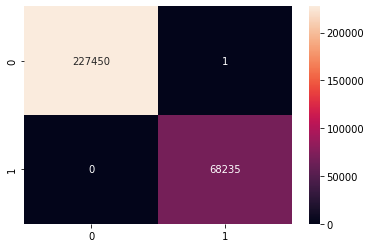

In [196]:
sns.heatmap(confusion_matrix(ytrain_smote,ytrain_predict_xg),annot=True,fmt='g')

In [197]:
ytrain_prob_xg=xg.predict_proba(xtrain_smote)[:,1]

In [198]:
fpr,tpr,thres=roc_curve(ytrain_smote,ytrain_prob_xg)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,2.000000e+00
1,0.000000,0.000132,9.999998e-01
2,0.000000,0.000572,9.999996e-01
3,0.000000,0.001817,9.999995e-01
4,0.000000,0.004147,9.999994e-01
...,...,...,...
21239,0.999626,1.000000,8.823969e-10
21240,0.999644,1.000000,8.815760e-10
21241,0.999666,1.000000,8.543664e-10
21242,0.999675,1.000000,8.434807e-10


Text(0.5, 1.0, 'ROC Curve')

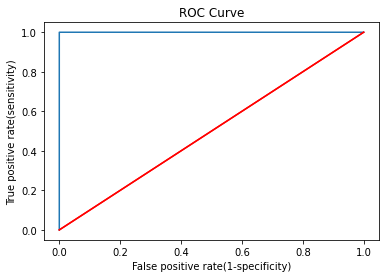

In [199]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [200]:
roc_auc_score(ytrain_smote,ytrain_prob_xg)

0.9999999999999999

# Test data

In [201]:
ytest_predict_xg=xg.predict(xtest)

In [202]:
print(classification_report(ytest,ytest_predict_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

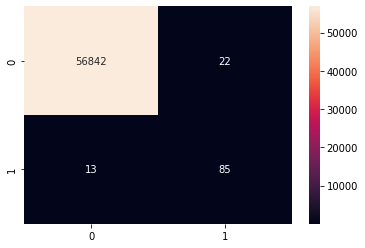

In [203]:
sns.heatmap(confusion_matrix(ytest,ytest_predict_xg),annot=True,fmt='g')

In [204]:
ytest_prob_xg=xg.predict_proba(xtest)[:,1]

In [205]:
fpr,tpr,thres=roc_curve(ytest,ytest_prob_xg)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.999999e+00
1,0.000000,0.010204,9.999990e-01
2,0.000000,0.061224,9.999958e-01
3,0.000000,0.081633,9.999952e-01
4,0.000000,0.285714,9.999816e-01
...,...,...,...
1820,0.995410,1.000000,2.645020e-09
1821,0.995445,1.000000,2.629591e-09
1822,0.996325,1.000000,2.387152e-09
1823,0.996377,1.000000,2.381681e-09


Text(0.5, 1.0, 'ROC Curve')

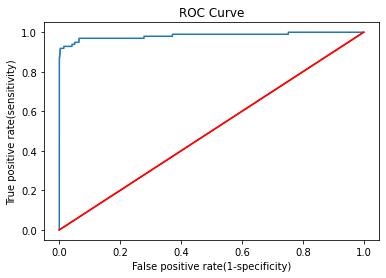

In [206]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [207]:
roc_auc_score(ytest,ytest_prob_xg)

0.9831621168444867

# hyperparameter tuning

In [213]:
params={'learning_rate': [0.1, 0.2, 0.3],
                     'max_depth': range(3,7),
                     'n_estimators':[3,4,5,6,7]}

In [214]:
search=GridSearchCV(xg,param_grid=params,cv=5,scoring='roc_auc')

In [215]:
search.fit(xtrain_smote,ytrain_smote)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                   

In [216]:
search.best_params_

{'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 7}

# XG Booster-best

In [217]:
xg_best=XGBClassifier(max_depth=6,n_estimators=7,learning_rate=0.3)

In [218]:
xg_best.fit(xtrain_smote,ytrain_smote)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=7, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [219]:
ytrain_predict_xg_best=xg_best.predict(xtrain_smote)

In [220]:
print(classification_report(ytrain_smote,ytrain_predict_xg_best))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    227451
           1       0.99      0.92      0.96     68235

    accuracy                           0.98    295686
   macro avg       0.99      0.96      0.97    295686
weighted avg       0.98      0.98      0.98    295686



<AxesSubplot:>

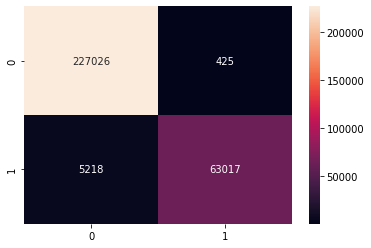

In [221]:
sns.heatmap(confusion_matrix(ytrain_smote,ytrain_predict_xg_best),annot=True,fmt='g')

In [222]:
ytrain_prob_xg_best=xg_best.predict_proba(xtrain_smote)[:,1]

In [223]:
fpr,tpr,thres=roc_curve(ytrain_smote,ytrain_prob_xg_best)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.944812
1,0.000000,0.000015,0.944812
2,0.000167,0.766015,0.944211
3,0.000167,0.766205,0.944111
4,0.000167,0.766527,0.943767
...,...,...,...
8381,0.999956,1.000000,0.044383
8382,0.999974,1.000000,0.042942
8383,0.999982,1.000000,0.042445
8384,0.999991,1.000000,0.033278


Text(0.5, 1.0, 'ROC Curve')

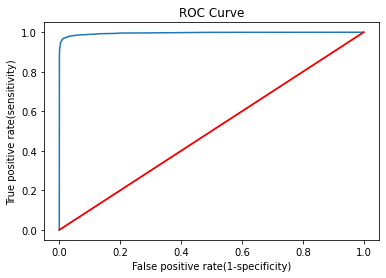

In [224]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [225]:
roc_auc_score(ytrain_smote,ytrain_prob_xg_best)

0.9962461543267607

# Test data

In [226]:
ytest_predict_xg_best=xg_best.predict(xtest)

In [227]:
print(classification_report(ytest,ytest_predict_xg_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.87      0.57        98

    accuracy                           1.00     56962
   macro avg       0.71      0.93      0.78     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

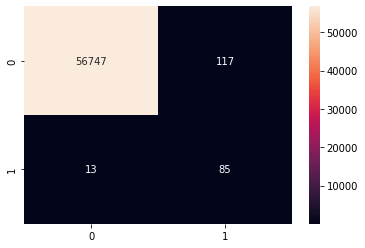

In [228]:
sns.heatmap(confusion_matrix(ytest,ytest_predict_xg_best),annot=True,fmt='g')

In [229]:
ytest_prob_xg_best=xg_best.predict_proba(xtest)[:,1]

In [230]:
fpr,tpr,thres=roc_curve(ytest,ytest_prob_xg_best)
roc_df=pd.DataFrame({'fpr':fpr,'tpr':tpr,'threshold':thres})
roc_df

,fpr,tpr,threshold
0,0.000000,0.000000,1.944211
1,0.000211,0.775510,0.944211
2,0.000211,0.785714,0.937568
3,0.000229,0.785714,0.936056
4,0.000229,0.795918,0.906339
...,...,...,...
3161,0.999578,1.000000,0.046130
3162,0.999807,1.000000,0.046105
3163,0.999824,1.000000,0.046025
3164,0.999859,1.000000,0.045999


Text(0.5, 1.0, 'ROC Curve')

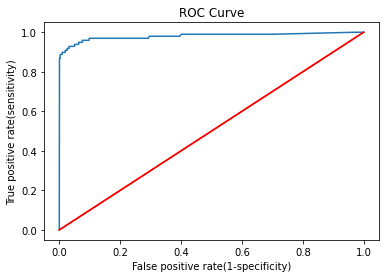

In [231]:
plt.plot(roc_df['fpr'],roc_df['tpr'])
plt.plot(([0,0],[1,1]),color='red')
plt.xlabel('False positive rate(1-specificity)')
plt.ylabel('True positive rate(sensitivity)')
plt.title('ROC Curve')

In [232]:
roc_auc_score(ytest,ytest_prob_xg_best)

0.980501364515981

# Variable importance plot

In [233]:
importances = pd.DataFrame(data={
    'Attribute': xtrain_smote.columns,
    'Importance': xg_best.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
14,V14,0.651970
17,V17,0.054978
4,V4,0.032224
12,V12,0.024791
8,V8,0.019970
26,V26,0.017032
6,V6,0.016838
10,V10,0.016547
27,V27,0.015995
2,V2,0.015706


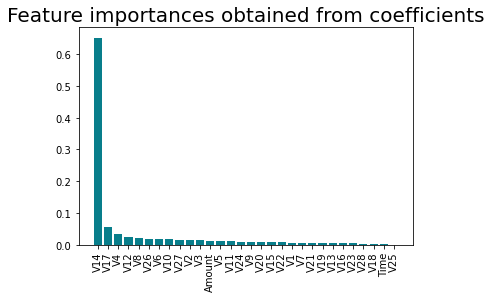

In [234]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# from the variable importance plot we can say that the variables v14,v17,v4,v12,v8,v26,v6,v10,v27,v2 are
#  influence the target variable more than other independent variables

# ODDS ratio

In [110]:
log_reg_smote.coef_

array([[-0.32872936,  0.58889718,  0.36728245,  0.09661504,  1.21933334,
         0.50929886, -0.38610209, -0.01265178, -0.40721314, -0.18723524,
        -0.82633748,  0.39587968, -0.63636568, -0.26941112, -0.8656037 ,
        -0.00434263, -0.15995392, -0.37398567, -0.20718073,  0.14557519,
        -0.29286888,  0.12453815,  0.40377907,  0.06901576, -0.04911853,
         0.01343636, -0.26372745, -0.02596609,  0.04351767,  0.68217842]])

In [111]:
log_reg_smote.intercept_

array([-4.39864216])

In [112]:
odds=np.exp(log_reg_smote.coef_).flatten()
len(odds)

30

In [113]:
df1=df.drop(columns='Class',axis=1)

In [114]:
len(df1.columns)

30

In [116]:
odd_ratio=pd.DataFrame({'col':df1.columns,'log_odds':odds})
odd_ratio.sort_values(by='log_odds',ascending=False)

,col,log_odds
4,V4,3.384930
29,Amount,1.978182
1,V1,1.802000
5,V5,1.664124
22,V22,1.497473
11,V11,1.485691
2,V2,1.443806
19,V19,1.156705
21,V21,1.132625
3,V3,1.101436


In [246]:
# From the above code v4,Amount,v1,v5,v22,v11,v2,v19,v21,v3 are the top significant variables with our target variable class

In [247]:
# Buisness Interpretation

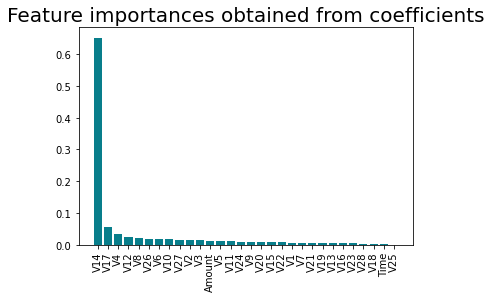

In [248]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [249]:
# from the variable importance plot we can say that the variables v14,v17,v4,v12,v8,v26,v6,v10,v27,v2 are
#  influence the target variable more than other independent variables